In [1]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import keras as ks
import pandas as pd
import torch
import seaborn as sns

To start with this project music part, I process topic and images i collected in following 4 steps:

1. Load and Explore the Dataset

2. feature engineering

3. Unsupervised learning

4. data preperation

# Music detection
-- a train on grouping music from Musical Instrunment's Sound Dataset --

In this project music part, I use the sound dataset found at kaggle. aim to use part of sound in dataset from single instrument to make clustering.

https://www.kaggle.com/datasets/soumendraprasad/musical-instruments-sound-dataset?resource=download


## STEP 1: Load and Explore the Dataset

The size of dataset sound of instruments is super huge and take years to load for each operation, thus I decide to only take look on piano sound

In [2]:
df_ls = pd.read_csv("music/archive/Metadata_Train.csv")
df_piano = df_ls[df_ls["Class"]=="Sound_Piano"]

In [3]:
import sklearn.datasets as datasets
import os
import tensorflow as tf
from scipy.io import wavfile
from scipy.signal import spectrogram

org_path = "music/archive/Train_submission/Train_submission"
music_l_tensor = []
for  music_name in df_piano["FileName"]:
    music_path = os.path.join(org_path, music_name)
    if music_name.lower().endswith(('.wav')): 
        sr, data = wavfile.read(music_path) 
        data = data.astype("float32")  
        tensor_audio = tf.convert_to_tensor(data, dtype=tf.float32)
        music_l_tensor.append((tensor_audio,sr))



In [4]:
len(music_l_tensor)

529

Beautiful piano sound!

In [21]:
import sounddevice as sd


for x in range(3):
    random_index = np.random.choice(len(music_l_tensor))
    at, sr = music_l_tensor[random_index]
    an= at.numpy()
    an = an / np.max(np.abs(an))
    sd.play(an, sr)
    sd.wait()

### spectrogram

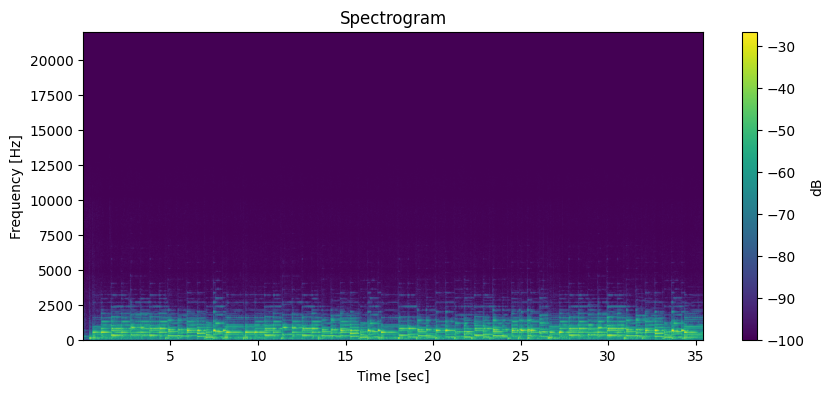

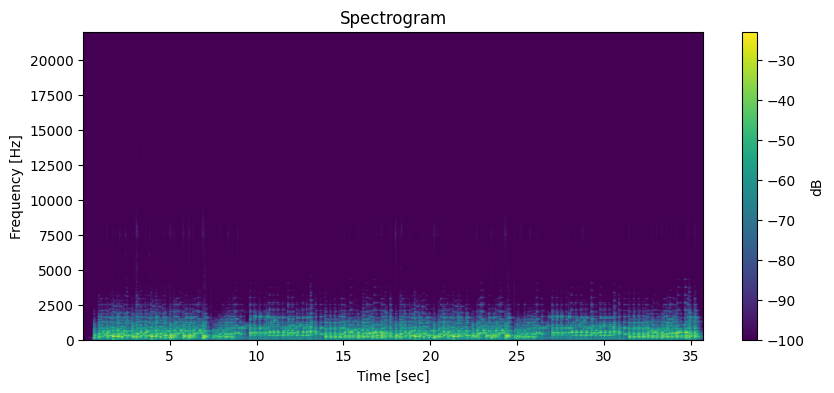

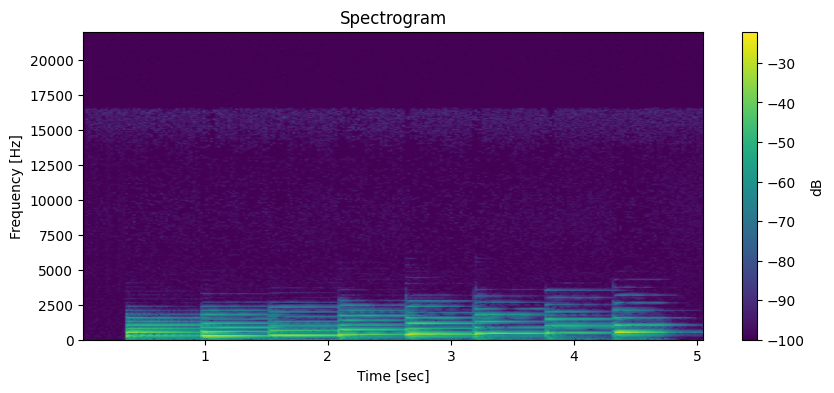

In [ ]:
from scipy.signal import spectrogram
for x in range(3):
    random_index = np.random.choice(len(music_l_tensor))
    at, sr = music_l_tensor[random_index]
    an = at.numpy()
    if an.ndim > 1:
        an = np.mean(an, axis=1) 
    an = an / np.max(np.abs(an))
    nperseg = min(1024, len(an) // 2)
    frequencies, times, Sxx = spectrogram(an, fs = sr, nperseg=nperseg)
    Sxx = 10 * np.log10(Sxx + 1e-10)
    plt.figure(figsize=(10, 4))
    plt.imshow(Sxx, aspect='auto', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title("Spectrogram")
    plt.colorbar(label='dB')
    plt.show()
    sd.play(an, sr)
    sd.wait()

Temporal and frequency based features

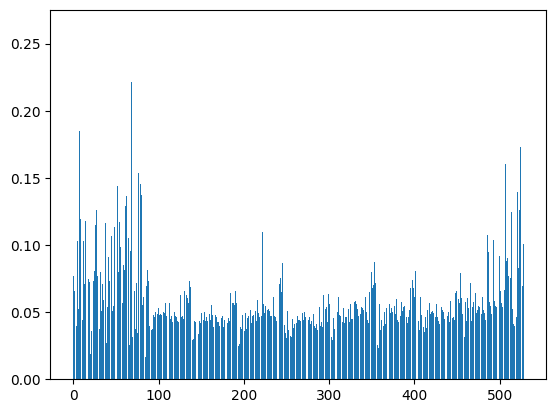

In [25]:
# Compute Zero-Crossing Rate
zcr_ls = []
for i in music_l_tensor:
    y, sr = i
    y = y.numpy()
    if len(y.shape) > 1:
        y = y.mean(axis=1)
    zcr = np.sum(np.abs(np.diff(np.sign(y)))) / len(y)
    zcr_ls.append(zcr)
plt.bar(range(len(zcr_ls)), zcr_ls)
plt.show()

/var/folders/0q/22f144kx4dn41cw151l589xh0000gn/T/ipykernel_1687/2822869831.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(10 * np.log10(Sxx), aspect='auto', origin='lower',


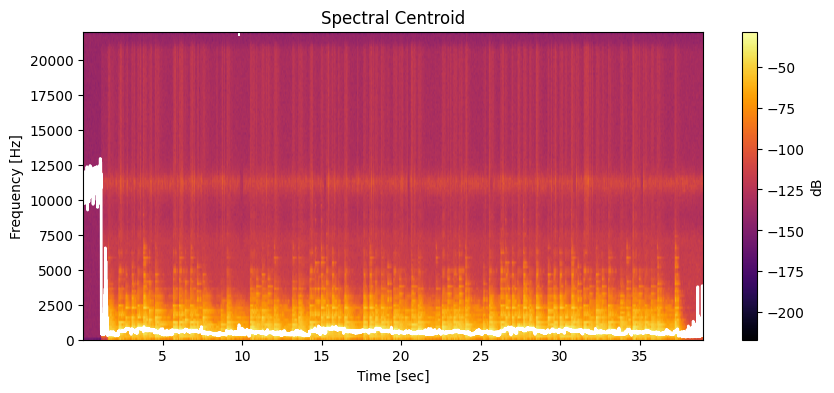

/var/folders/0q/22f144kx4dn41cw151l589xh0000gn/T/ipykernel_1687/2822869831.py:10: RuntimeWarning: invalid value encountered in divide
  centroid = np.sum(frequencies[:, None] * Sxx, axis=0) / np.sum(Sxx, axis=0)


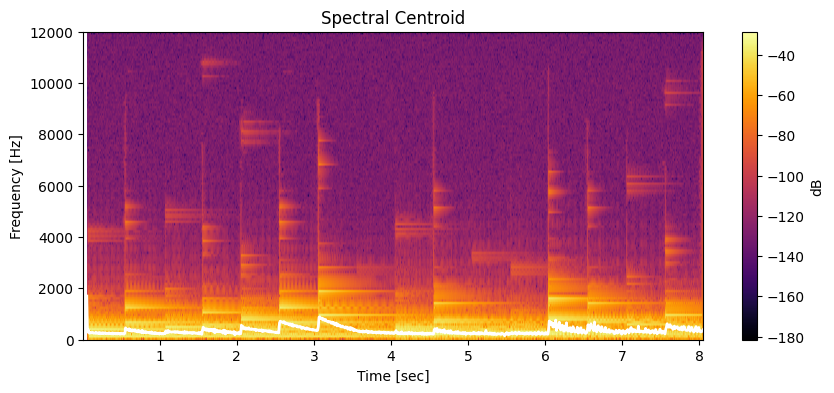

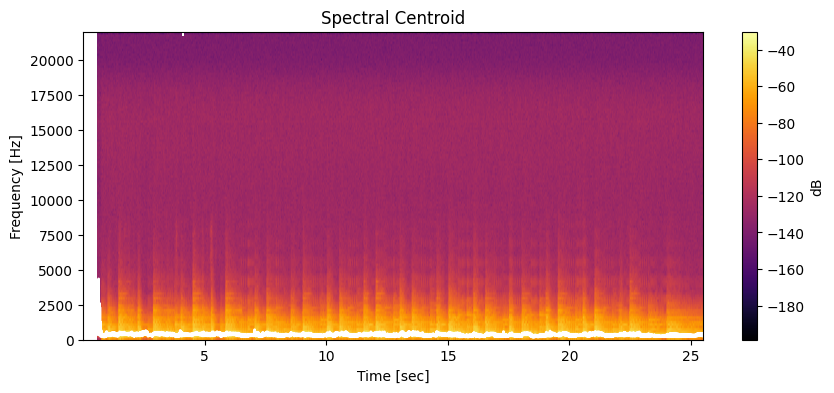

In [86]:
# # Spectral Centroid
for x in range(3):
    random_index = np.random.choice(len(music_l_tensor))
    at, sr = music_l_tensor[random_index]
    an = at.numpy()
    if an.ndim > 1:
        an = np.mean(an, axis=1) 
    an = an / np.max(np.abs(an))
    frequencies, times, Sxx = spectrogram(an, sr)
    centroid = np.sum(frequencies[:, None] * Sxx, axis=0) / np.sum(Sxx, axis=0)
    plt.figure(figsize=(10, 4))
    plt.imshow(10 * np.log10(Sxx), aspect='auto', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()], cmap='inferno')
    plt.plot(times, centroid, color='white', linewidth=2, label="Spectral Centroid")
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title("Spectral Centroid")
    plt.colorbar(label='dB')
    plt.show()
#     sd.play(an, sr)
#     sd.wait()

## STEP 2: feature engineering

### 1. Experiment with windowing

Audio length: 1059840, nperseg: 1024, Window size: 1024


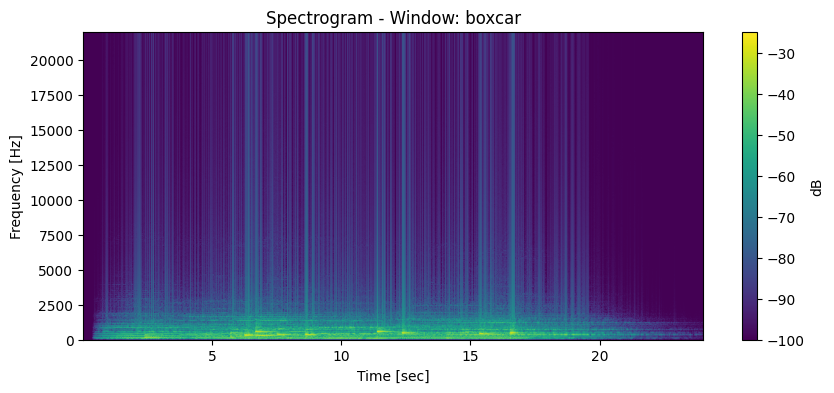

Audio length: 1059840, nperseg: 1024, Window size: 1024


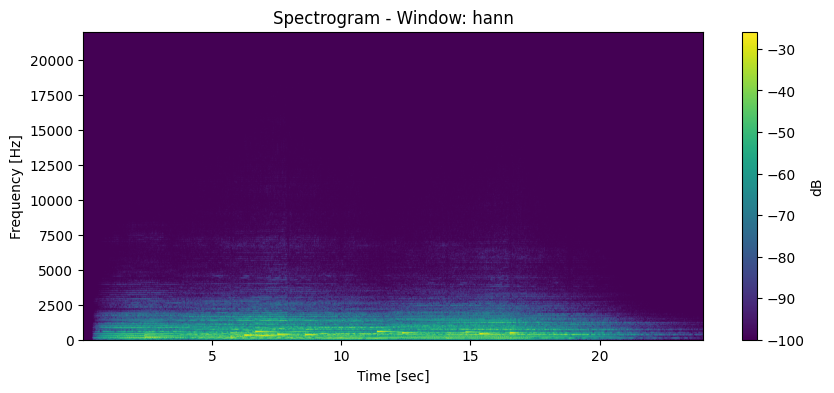

Audio length: 1059840, nperseg: 1024, Window size: 1024


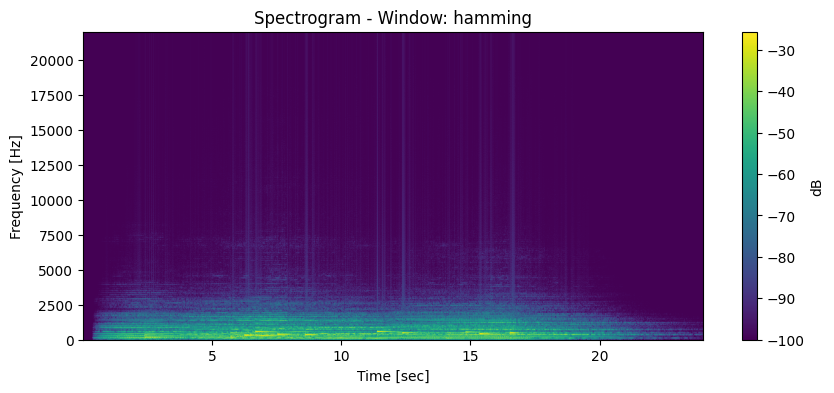

Audio length: 1059840, nperseg: 1024, Window size: 1024


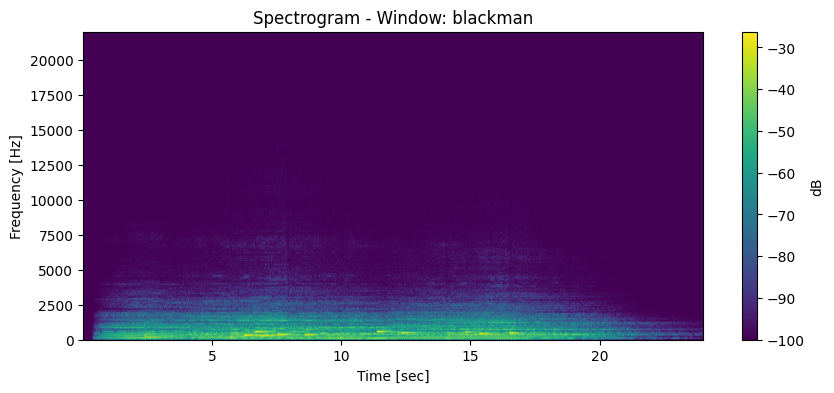

Audio length: 1059840, nperseg: 1024, Window size: 1024


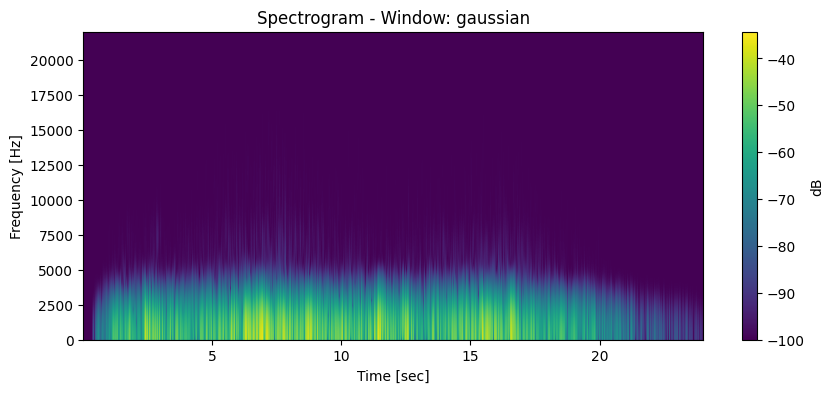

Audio length: 1059840, nperseg: 1024, Window size: 1024


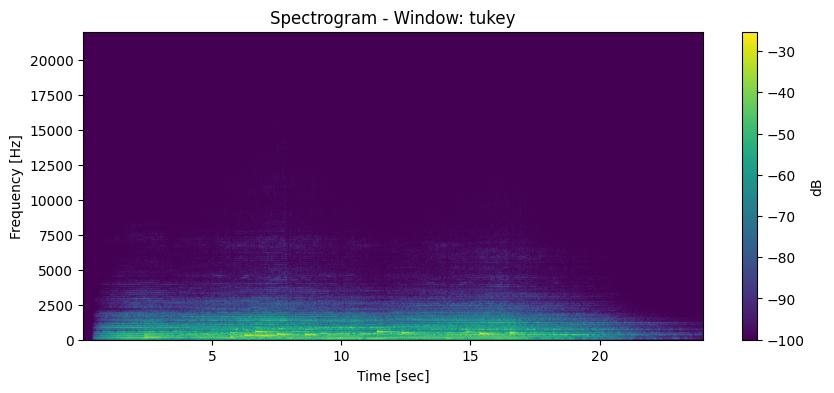

Audio length: 1350562, nperseg: 1024, Window size: 1024


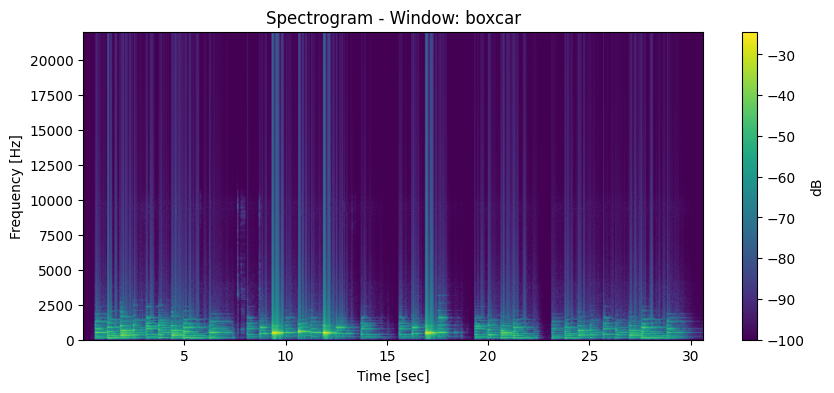

Audio length: 1350562, nperseg: 1024, Window size: 1024


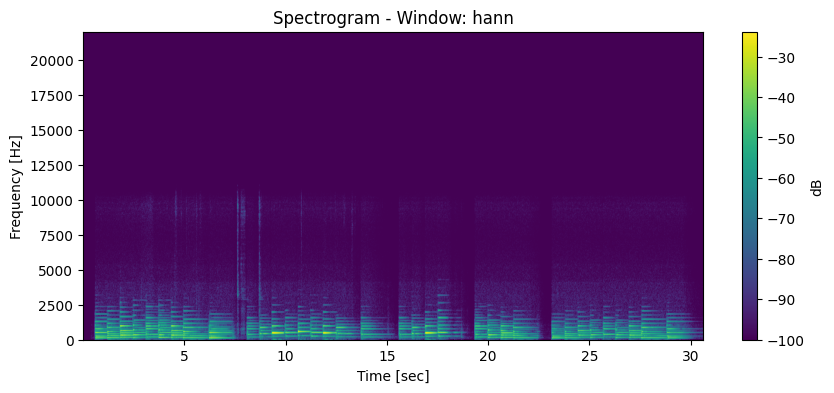

Audio length: 1350562, nperseg: 1024, Window size: 1024


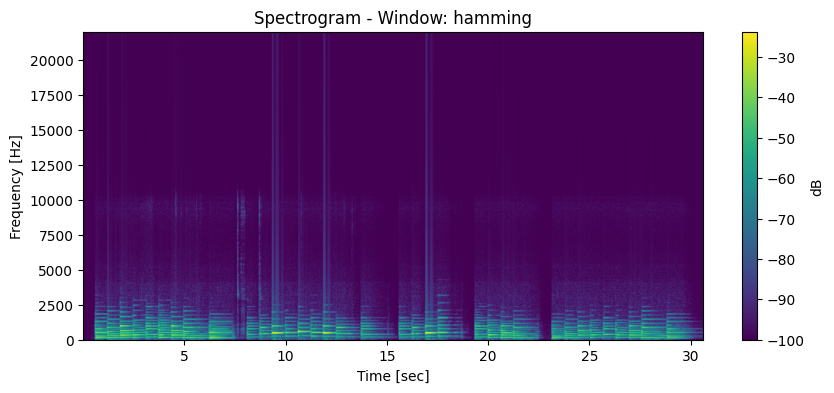

Audio length: 1350562, nperseg: 1024, Window size: 1024


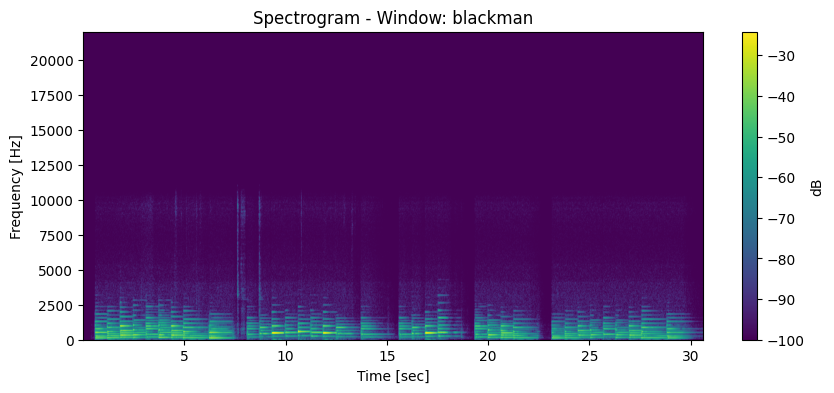

Audio length: 1350562, nperseg: 1024, Window size: 1024


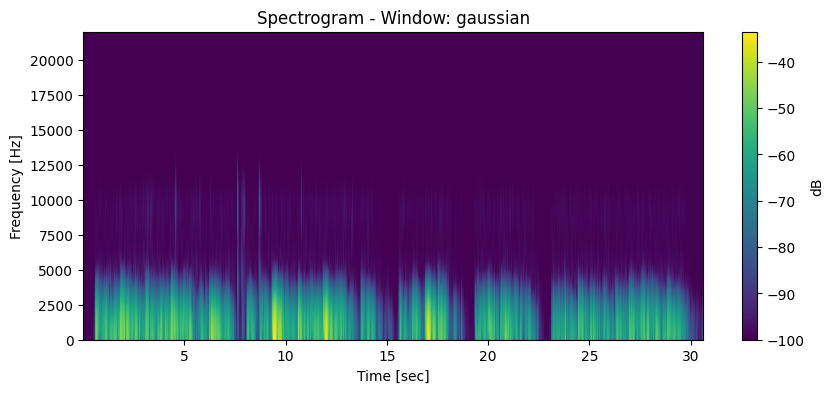

Audio length: 1350562, nperseg: 1024, Window size: 1024


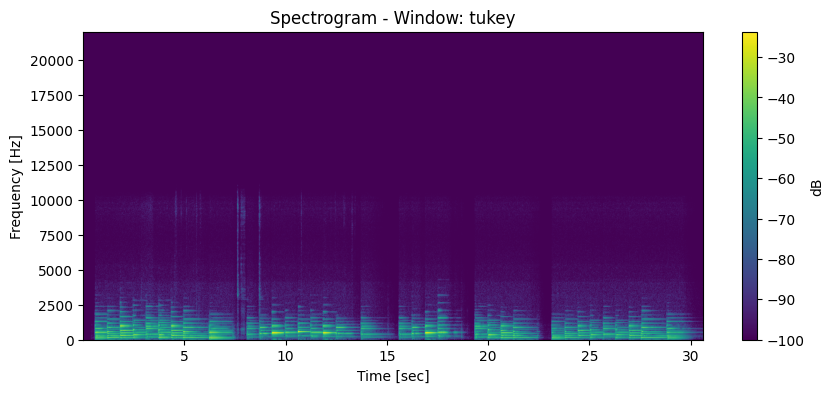

Audio length: 694575, nperseg: 1024, Window size: 1024


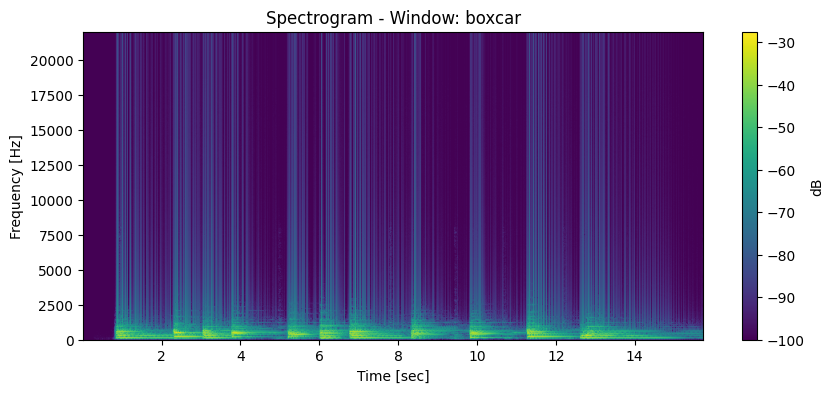

Audio length: 694575, nperseg: 1024, Window size: 1024


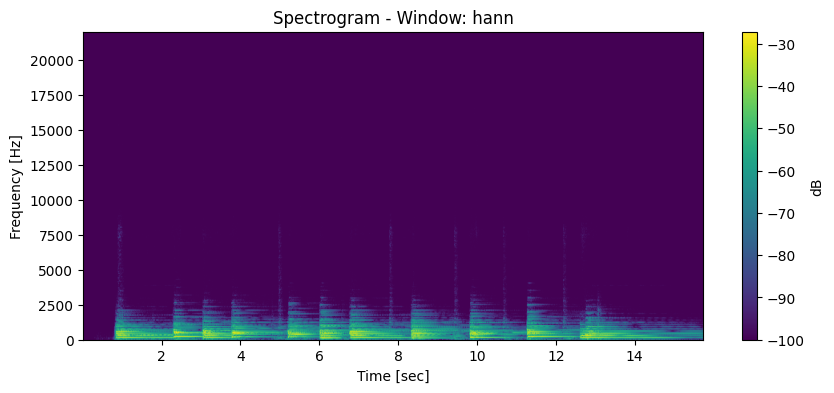

Audio length: 694575, nperseg: 1024, Window size: 1024


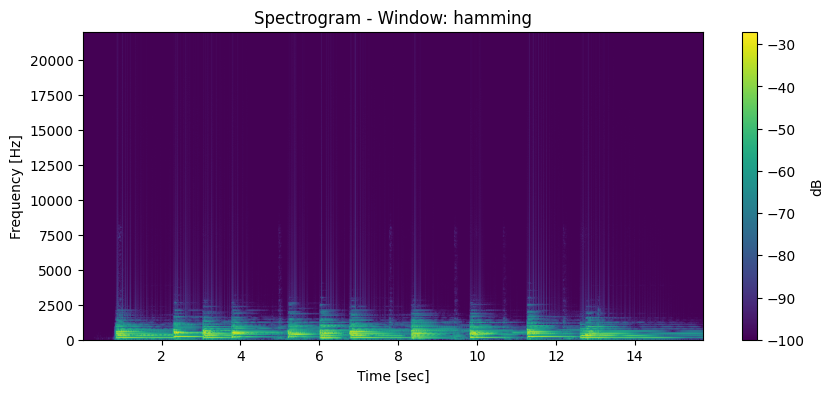

Audio length: 694575, nperseg: 1024, Window size: 1024


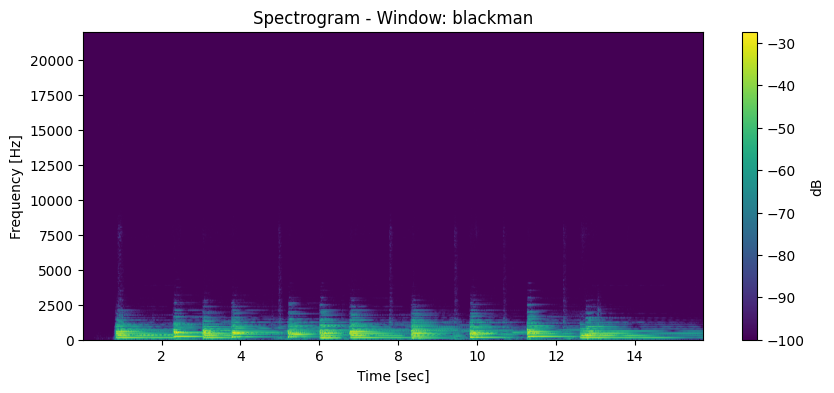

Audio length: 694575, nperseg: 1024, Window size: 1024


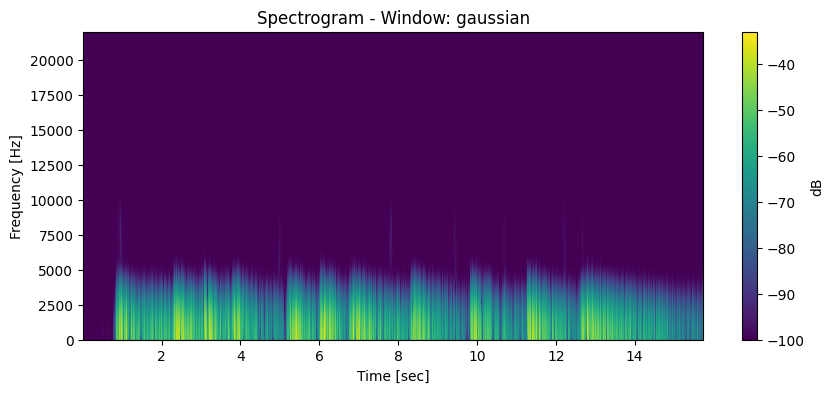

Audio length: 694575, nperseg: 1024, Window size: 1024


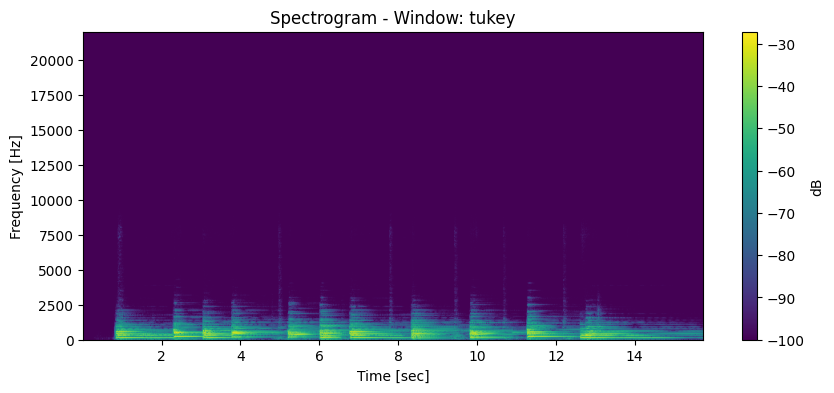

In [12]:

from scipy.signal import get_window
for x in range(3):
    random_index = np.random.choice(len(music_l_tensor))
    at, sr = music_l_tensor[random_index]
    an = at.numpy()
    if an.ndim > 1:
        an = np.mean(an, axis=1) 
    an = an / np.max(np.abs(an))
    window_types = ["boxcar", "hann", "hamming", "blackman", "gaussian", "tukey"]
    for i, window_type in enumerate(window_types):
        nperseg = min(1024, len(an)//2)
        if len(an) < nperseg:
            nperseg = len(an)
        if window_type == "gaussian":
            window = get_window((window_type, 5), nperseg)  
        elif window_type == "tukey":
            window = get_window((window_type, 0.5), nperseg)  
        else:
            window = get_window(window_type, nperseg)
        print(f"Audio length: {len(an)}, nperseg: {nperseg}, Window size: {len(window)}")

        frequencies, times, Sxx = spectrogram(an, fs = sr, nperseg=nperseg, window=window)
        Sxx = 10 * np.log10(Sxx + 1e-10)
        plt.figure(figsize=(10, 4))
        plt.imshow(Sxx, aspect='auto', origin='lower',
            extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        st = "Spectrogram - Window: "+ window_type
        plt.title(st)
        plt.colorbar(label='dB')
        plt.show()
    # sd.play(an, sr)
    # sd.wait()

### 2. Fourier transform

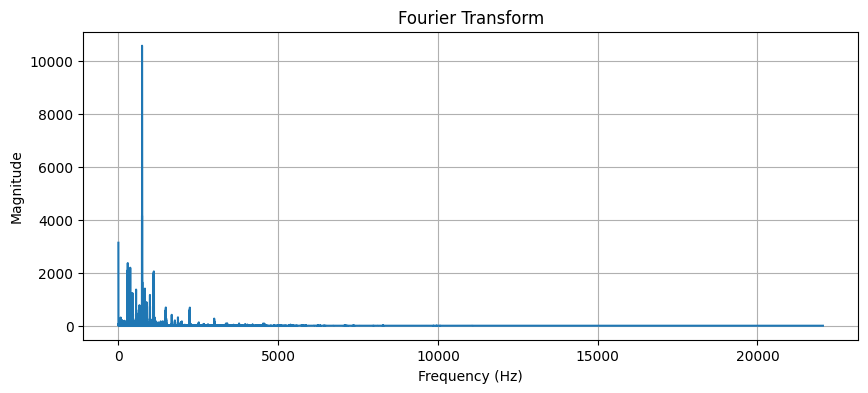

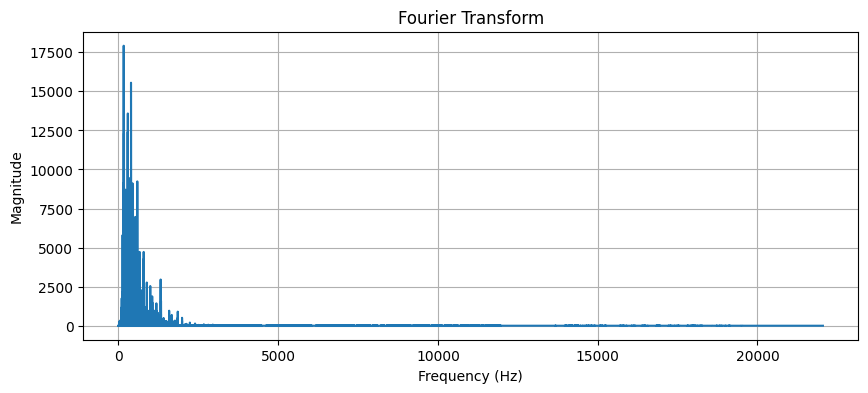

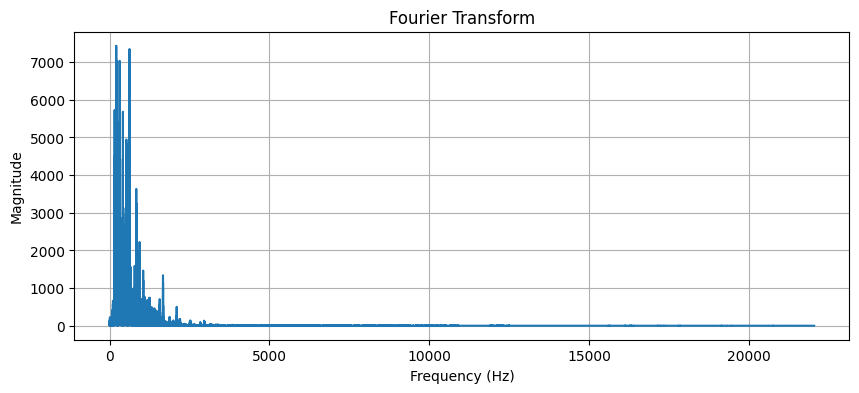

In [88]:
from scipy.fftpack import fft, fftfreq
for x in range(3):
    random_index = np.random.choice(len(music_l_tensor))
    at, sr = music_l_tensor[random_index]
    an = at.numpy()
    if an.ndim > 1:
        an = np.mean(an, axis=1) 
    an = an / np.max(np.abs(an))
    n = len(an)
    fft_op = fft(an)
    freq = fftfreq(n, d=1/sr)
    half_n = n // 2
    fft_mag = np.abs(fft_op[:half_n]) 
    freq = freq[:half_n]

    plt.figure(figsize=(10,4))
    plt.plot(freq, fft_mag)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.title("Fourier Transform")
    plt.grid()
    plt.show()

### 3. Spectrogram normalization

Since the length of each music is different, and padding would seriously damage the unsupervise spacial information. I use window to catch 10 second music as spectrogram and normalize it for further operation

In [21]:
min_time = 1000
for x in range(len(music_l_tensor)):
    at, sr = music_l_tensor[x]
    an = at.numpy()
    
    if an.ndim > 1:
        an = np.mean(an, axis=1)  

    an = an / np.max(np.abs(an))
    nperseg = min(1024, len(an) // 2)
    frequencies, times, Sxx = spectrogram(an, fs=sr, nperseg=nperseg)

    min_time = min(min_time, Sxx.shape[1])

In [22]:
min_time

62

In [4]:
import cv2

norm_tf = []
sxx_ls = []
max_freq = 22050
max_time = 500
for x in range(len(music_l_tensor)):
    at, sr = music_l_tensor[x]
    an = at.numpy()
    if an.ndim > 1:
        an = np.mean(an, axis=1) 
    an = an / np.max(np.abs(an))
    nperseg = min(1024, len(an) // 2)
    ten_sec_samples = int(sr * 10)
    if len(an) > ten_sec_samples:  
        an = an[:ten_sec_samples]
    frequencies, times, Sxx = spectrogram(an, fs = sr, nperseg=nperseg)
    Sxx = 10 * np.log10(Sxx + 1e-10)
    # if np.max(frequencies) > max_freq:
    #     max_freq = np.max(frequencies)
    # if np.max(times) > max_time:
    #     max_time = np.max(times)
    padded_Sxx = np.zeros((Sxx.shape[0], max_time))
    padded_Sxx[: Sxx.shape[0], : Sxx.shape[1]] = Sxx
    sxx_ls.append(padded_Sxx)
# print(max_freq)
# print(max_time)
sxx_ls = np.array(sxx_ls)
sxx_ls.shape




(529, 513, 500)

In [5]:
sxx_ls_mean = np.mean(sxx_ls)
sxx_ls_std = np.std(sxx_ls)
sxx_norm_tf = (sxx_ls - sxx_ls_mean)/sxx_ls_std

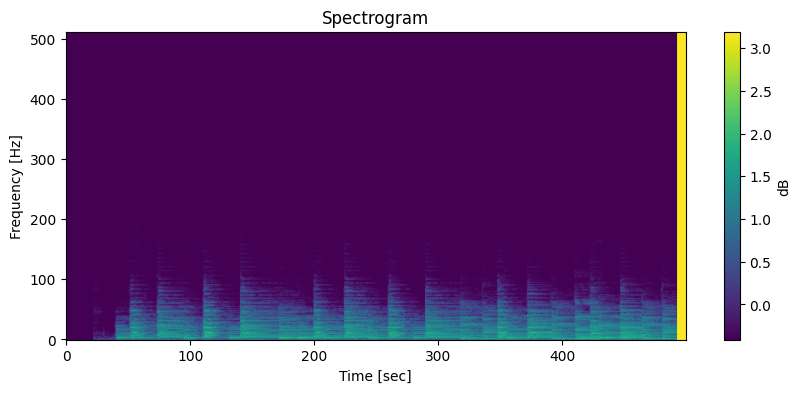

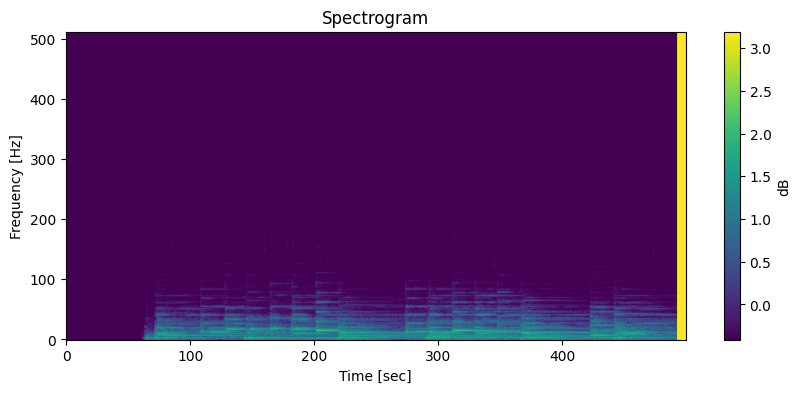

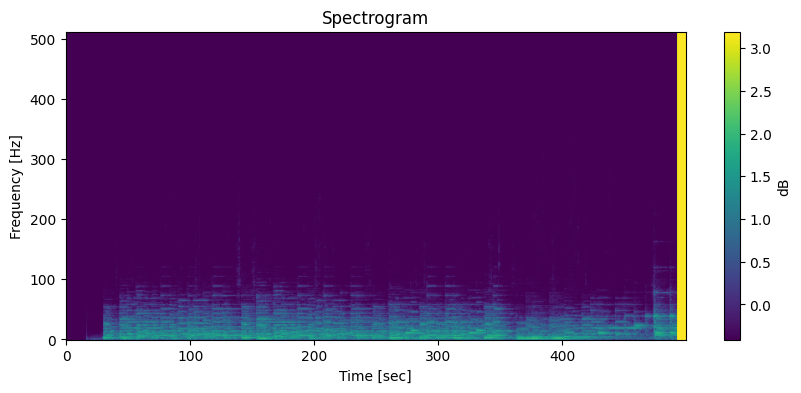

In [6]:

for x in range(3):
    random_index = np.random.choice(len(sxx_ls))
    Sxx = sxx_norm_tf[random_index]
    #Sxx = Sxx*sxx_ls_std + sxx_ls_mean
    plt.figure(figsize=(10, 4))
    plt.imshow(Sxx, aspect='auto', origin='lower')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title("Spectrogram")
    plt.colorbar(label='dB')
    plt.show()
    # sd.play(an, sr)
    # sd.wait()

Normalized data prepared

## STEP 3: Unsupervised Learning

For spectrogram as input data, i can keep it as matrix, or use spectrogram image directly. Since matrix need more calculation potentially, we use matrix normalized in last step

### Clustering algorithms: k-means, hierarchical clustering, DBSCAN

In [8]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

1
2
3
4
5
6
7
8
9
10
11
12
13
14


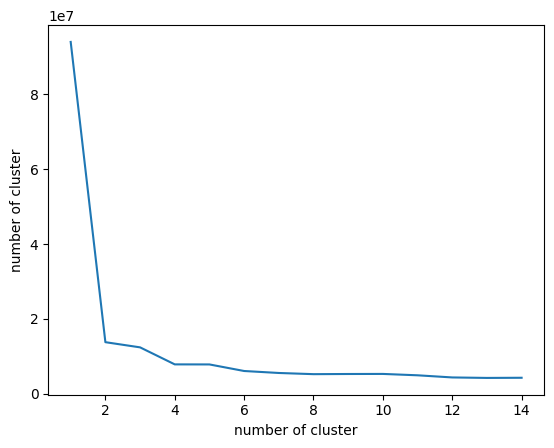

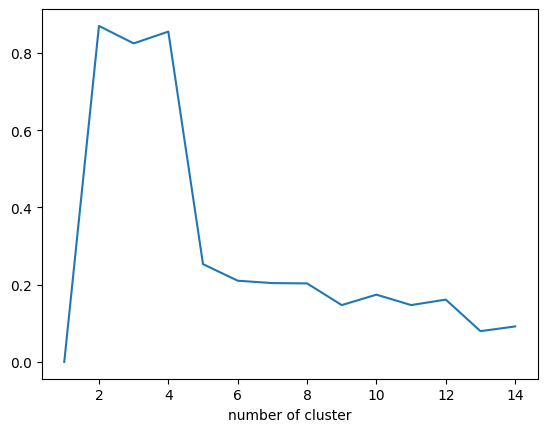

In [42]:
#k-means (base on pixel centriod)
sxx_norm_tf
ls_score = []
ls = []
x = sxx_norm_tf.reshape(len(sxx_norm_tf), -1)
for i in range(1,15):
    print(i)
    kmeans=KMeans(n_clusters=i, init='k-means++')
    cb = kmeans.fit_predict(x)
    #kmeans.fit(df_y)
    #print(cb)
    if len(set(cb)) > 1: 
        score = silhouette_score(x, cb)
        #print(score)
        ls_score.append(score)
    else:ls_score.append(0)
    ls.append(kmeans.inertia_)

plt.plot(range(1,15), ls)
plt.xlabel("number of cluster")
plt.ylabel("number of cluster")
plt.show()
plt.plot(range(1,15), ls_score)
plt.xlabel("number of cluster")
plt.show()


label:  3


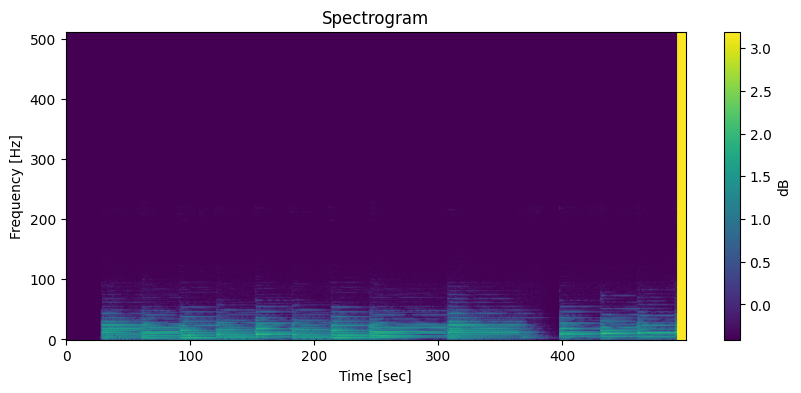

label:  3


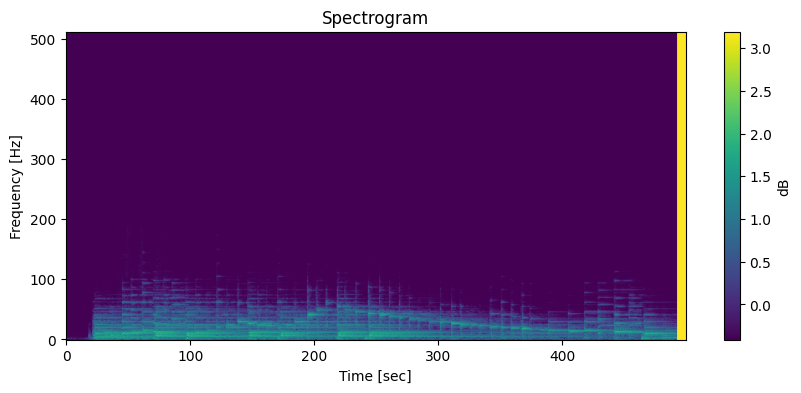

label:  3


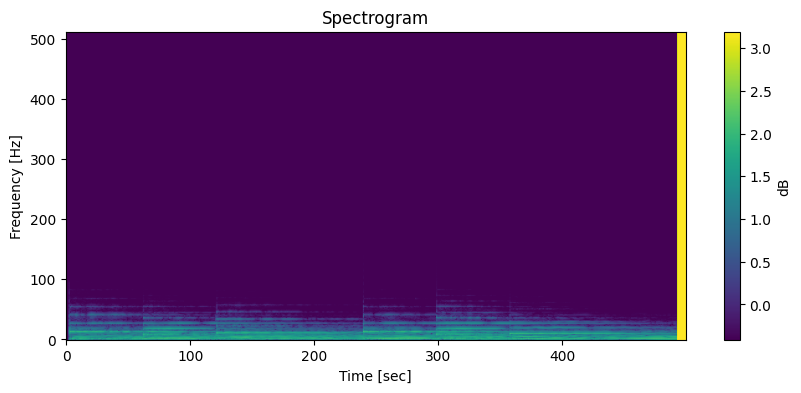

label:  2


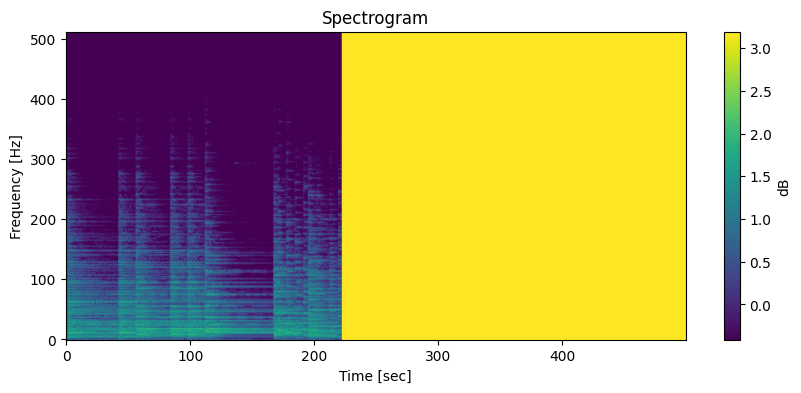

label:  3


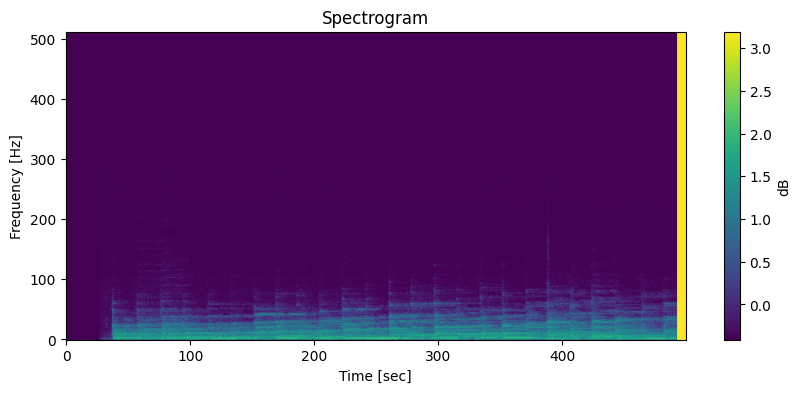

In [43]:
#k-mean optimal
#Through inertia and silhouette-score, we can see cluster of 4 is best
kmeans=KMeans(n_clusters=4, init='k-means++')
cb = kmeans.fit_predict(x)
random_index = -1
for x in range(5):
    random_index = np.random.choice(len(sxx_ls))
    print("label: ", cb[random_index])
    Sxx = sxx_norm_tf[random_index]
    #Sxx = Sxx*sxx_ls_std + sxx_ls_mean
    plt.figure(figsize=(10, 4))
    plt.imshow(Sxx, aspect='auto', origin='lower')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title("Spectrogram")
    plt.colorbar(label='dB')
    plt.show()

In [9]:
#DBSCAN
ls = []
from sklearn.decomposition import PCA
x = sxx_norm_tf.reshape(len(sxx_norm_tf), -1)
# pca = PCA(n_components=50)
# x = pca.fit_transform(x)
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    print(i)
    for j in range(1,11):
        print(j)
        dbsan_c = DBSCAN(eps=i, min_samples=j, metric='euclidean')
        dset = dbsan_c.fit(x).labels_
        num_clusters = len(set(dset)) - (1 if -1 in dset else 0)
        if len(x) - 1 > num_clusters > 1:  
            score = silhouette_score(x, dset)
            ls.append(score)
            print("i: ",i,", j: ",j, ", score: ",score)
        else:
            ls.append(0)

0.1
1
2
3
4
5
6
7
8
9
10
0.2
1
2
3
4
5
6
7
8
9
10
0.3
1
2
3
4
5
6
7
8
9
10
0.4
1
2
3
4
5
6
7
8
9
10
0.5
1
2
3
4
5
6
7
8
9
10
0.6
1
2
3
4
5
6
7
8
9
10
0.7
1
2
3
4
5
6
7
8
9
10
0.8
1
2
3
4
5
6
7
8
9
10
0.9
1
2
3
4
5
6
7
8
9
10


label:  -1


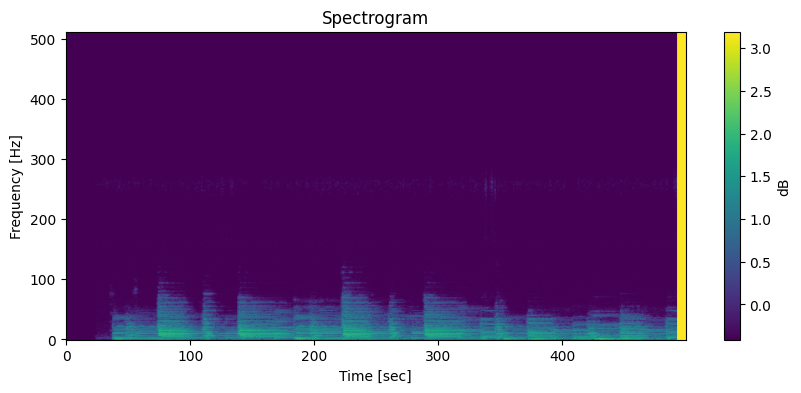

label:  -1


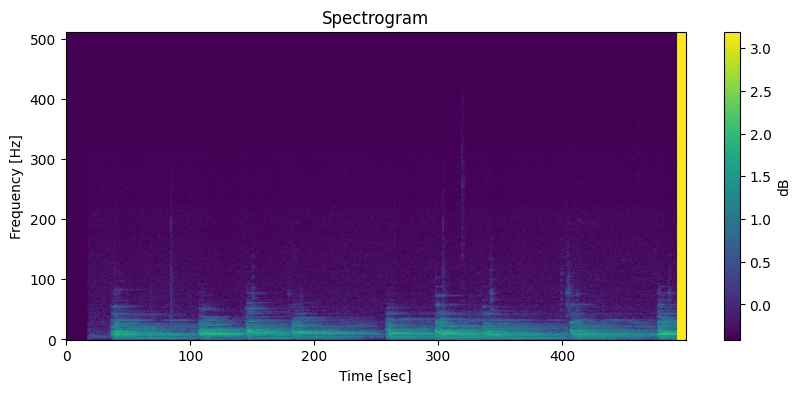

label:  -1


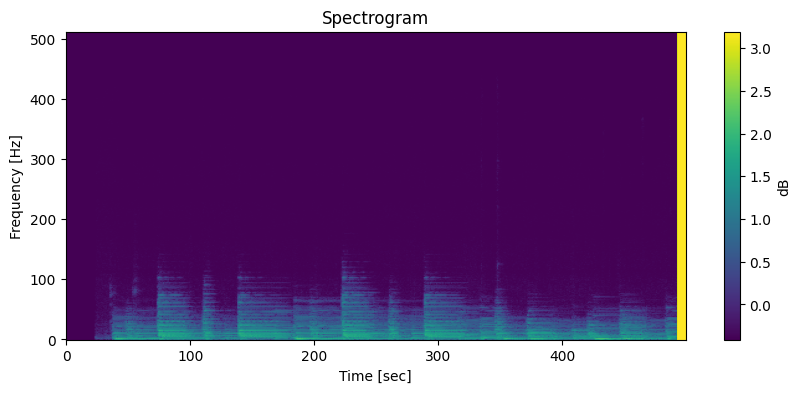

label:  -1


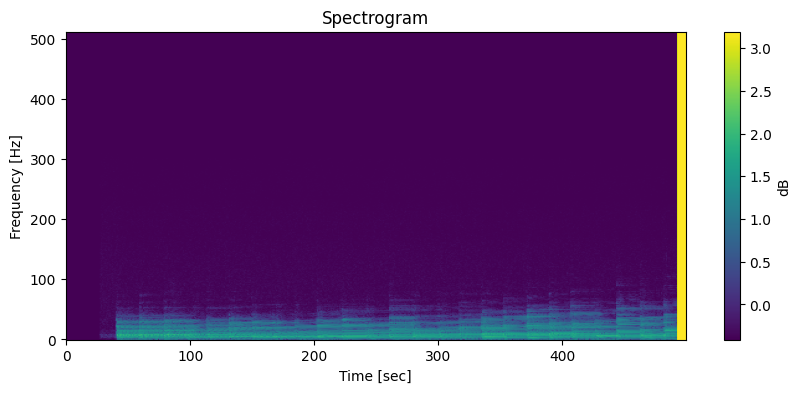

label:  -1


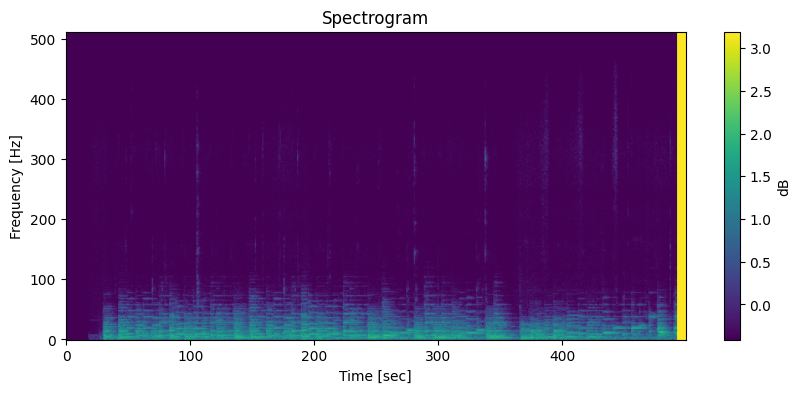

In [11]:
#optim dbscan
#DBSCAN seems not working...
dbsan_c = DBSCAN(eps=20, min_samples=4, metric='euclidean')
cb = dbsan_c.fit(x).labels_
random_index = -1
for x in range(5):
    random_index = np.random.choice(len(sxx_ls))
    print("label: ", cb[random_index])
    Sxx = sxx_norm_tf[random_index]
    #Sxx = Sxx*sxx_ls_std + sxx_ls_mean
    plt.figure(figsize=(10, 4))
    plt.imshow(Sxx, aspect='auto', origin='lower')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title("Spectrogram")
    plt.colorbar(label='dB')
    plt.show()

In [13]:
#hierachical clustering
best_score = 0
x = sxx_norm_tf.reshape(len(sxx_norm_tf), -1)
for k in range(1,20):
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(x)

    if len(set(labels)) > 1: 

        score = silhouette_score(x, labels)

        if score > best_score:
            best_score = score
            print(k)

2


label:  1


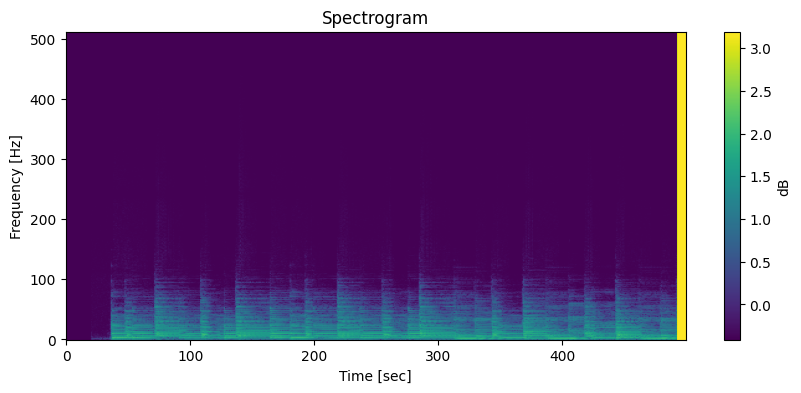

label:  1


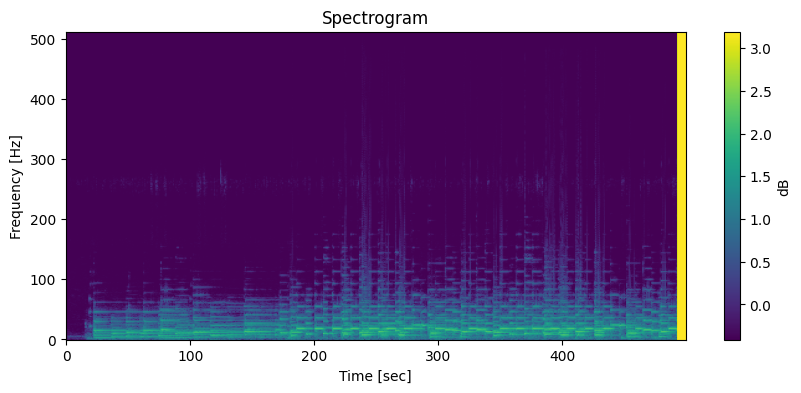

label:  1


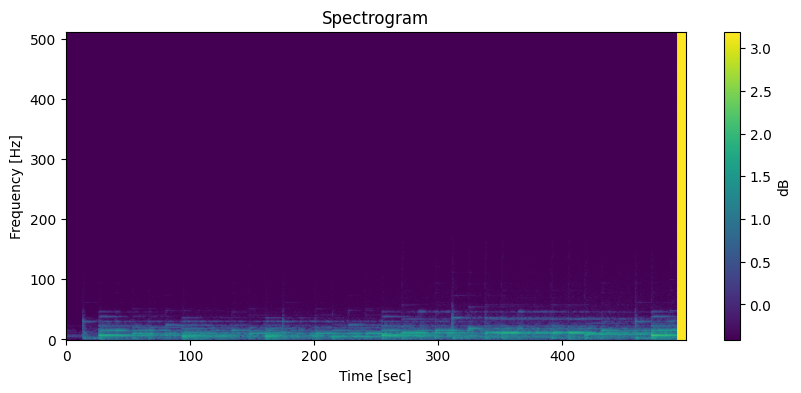

label:  0


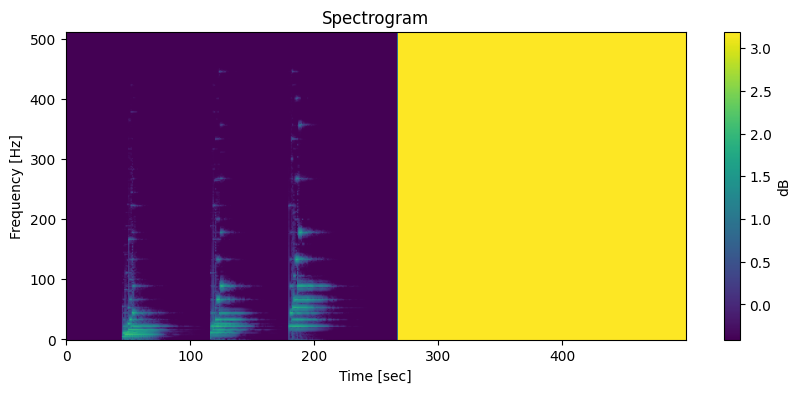

label:  1


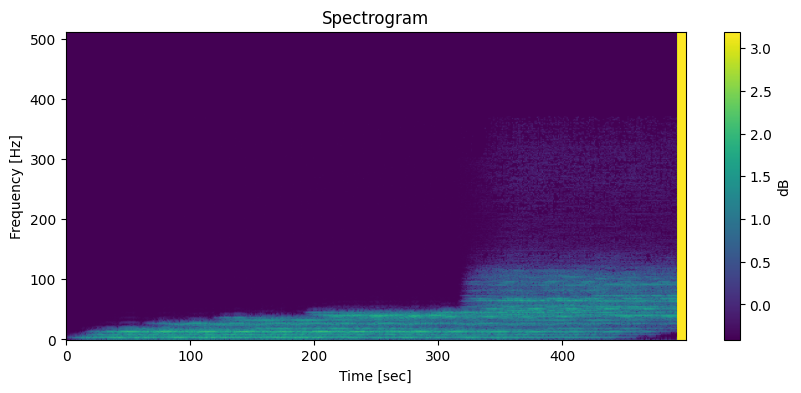

In [16]:
model = AgglomerativeClustering(n_clusters=2, linkage='ward')
x = sxx_norm_tf.reshape(len(sxx_norm_tf), -1)
cb = model.fit_predict(x)
for x in range(5):
    random_index = np.random.choice(len(sxx_ls))
    print("label: ", cb[random_index])
    Sxx = sxx_norm_tf[random_index]
    #Sxx = Sxx*sxx_ls_std + sxx_ls_mean
    plt.figure(figsize=(10, 4))
    plt.imshow(Sxx, aspect='auto', origin='lower')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title("Spectrogram")
    plt.colorbar(label='dB')
    plt.show()

The dataset have unfortunate padding problem, thus some clustering might be problematic...

### Dimensionality Reduction

(529, 256500)


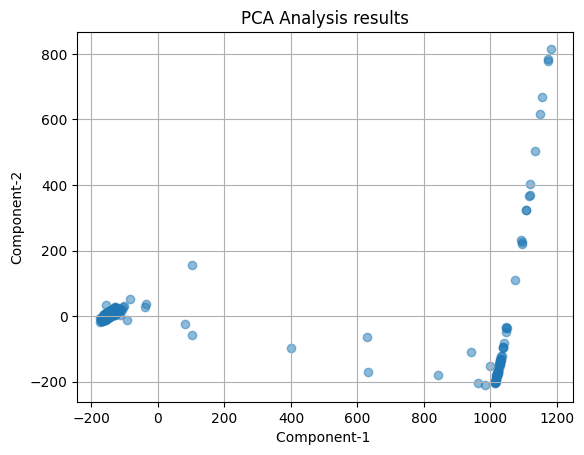

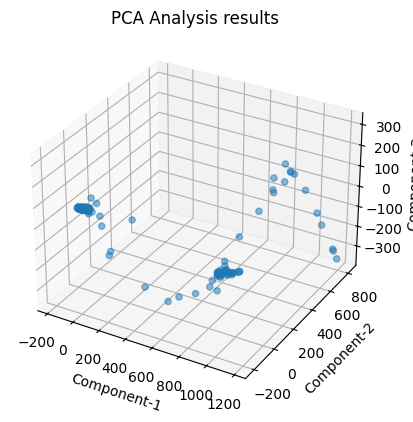

In [17]:
#PCA
from sklearn.decomposition import PCA
x = sxx_norm_tf.reshape(len(sxx_norm_tf), -1)
print(x.shape)
#df_y = digits.target
def plot_2D(X,color_vector, method):
    fig, ax = plt.subplots()
    scatter = ax.scatter(X[:,0], X[:,1], alpha=0.5) #, c=y
    ax.set(xlabel='Component-1 ', ylabel='Component-2',
    title=f'{method} Analysis results')
    ax.grid()
    # legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
    #                               markerfacecolor=scatter.cmap(scatter.norm(label)),
    #                               markersize=8, label=str(label)) for label in np.unique(color_vector)]
    #ax.legend(handles=legend_elements)
    plt.show()
def plot_3D(X, color_vector, method):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], alpha=0.5)
    ax.set(xlabel='Component-1', ylabel='Component-2', zlabel='Component-3',
           title= f'{method} Analysis results')
    # legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
    #                               markerfacecolor=scatter.cmap(scatter.norm(label)),
    #                               markersize=8, label=str(label)) for label in np.unique(color_vector)]
    # ax.legend(handles=legend_elements)
    plt.show()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)
plot_2D(X_pca,[], "PCA")
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x)
plot_3D(X_pca,[], "PCA")

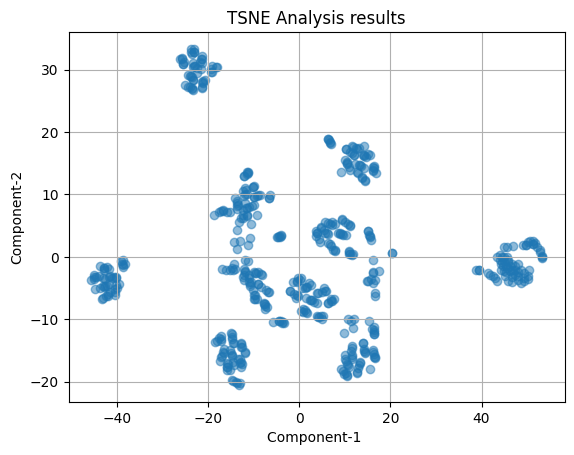

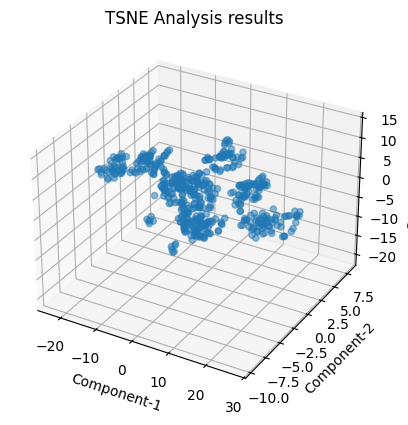

In [18]:
#t-SNE

\
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(x)
plot_2D(X_tsne,[], "TSNE")
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(x)
plot_3D(X_tsne,[], "TSNE")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


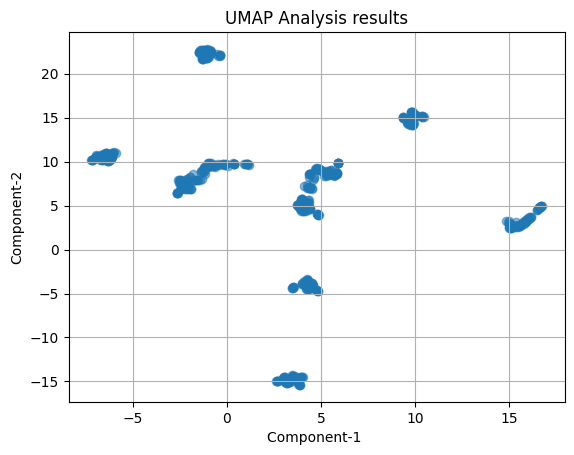

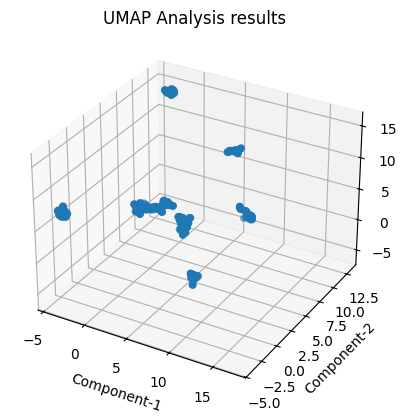

In [19]:
#UMAP
import umap
df_y = []
umap_1 = umap.UMAP(n_components=2)
X_umap = umap_1.fit_transform(x)
plot_2D(X_umap,df_y, "UMAP")
umap_1 = umap.UMAP(n_components=3)
X_umap = umap_1.fit_transform(x)
plot_3D(X_umap,df_y, "UMAP")


Unbelievablly good on seperating..

k-mean seems have most meaningful clustering, we can have a look in umap

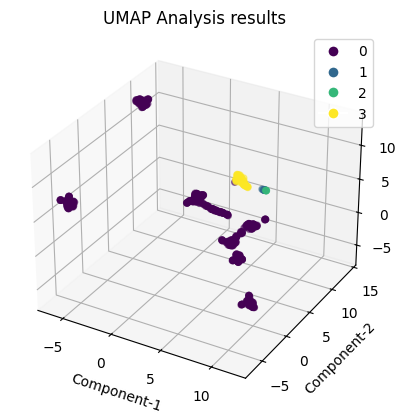

In [ ]:
#
kmeans=KMeans(n_clusters=4, init='k-means++')
cb = kmeans.fit_predict(x)
X_umap = umap.UMAP(n_components=3).fit_transform(x)
def plot_3D(X, color_vector, method):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2],c = color_vector, alpha=0.5)
    ax.set(xlabel='Component-1', ylabel='Component-2', zlabel='Component-3',
           title= f'{method} Analysis results')
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                   markerfacecolor=scatter.cmap(scatter.norm(label)),
                                   markersize=8, label=str(label)) for label in np.unique(color_vector)]
    ax.legend(handles=legend_elements)
    plt.show()
plot_3D(X_umap,cb, "UMAP")

## STEP 4: Dataset Preparation

The dataset prepared in this music part would be the spectrogram images of instead of music itself, which can be perfectly demestrate on a 2d image.

K mean clustering is not great, but without manually split clustering on umap, k mean is the best currently.

In [23]:

x = sxx_norm_tf.reshape(len(sxx_norm_tf), -1)
kmeans=KMeans(n_clusters=4, init='k-means++')
cb = kmeans.fit_predict(x)

In [25]:
org_path = "music/archive/Train_submission/Train_submission"
file_name = []
for music_name in df_piano["FileName"]:
    music_path = os.path.join(org_path, music_name)
    if music_name.lower().endswith(('.wav')): 
        file_name.append(music_name)

In [28]:
for k in range(sxx_norm_tf.shape[0]):
    Sxx = sxx_norm_tf[k]
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.imshow(Sxx, aspect='auto', origin='lower', cmap='inferno')
    save_path = file_name[k].split(".")[0]
    plt.savefig(f"music/spectrogram/{save_path}.jpg", bbox_inches='tight', pad_inches=0, dpi=300)
    plt.close() 

In [32]:
import shutil
from sklearn.model_selection import train_test_split
image_labels = {file_name[i]: cb[i] for i in range(sxx_norm_tf.shape[0])}
print(image_labels)
dataset_path = "music_dataset"
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")
for label in np.unique(cb):
    os.makedirs(os.path.join(train_path, f"class_{label}"), exist_ok=True)
    os.makedirs(os.path.join(test_path, f"class_{label}"), exist_ok=True)
img_names = list(image_labels.keys())
train_images, test_images = train_test_split(img_names, test_size=0.2, stratify=cb, random_state=42)
for img_name in train_images:
    label = image_labels[img_name]
    img_n = img_name.split(".")[0]
    shutil.copy(f"music/spectrogram/{img_n}.jpg", f"{train_path}/class_{label}/{img_n}.jpg")
for img_name in test_images:
    label = image_labels[img_name]
    img_n = img_name.split(".")[0]
    shutil.copy(f"music/spectrogram/{img_n}.jpg", f"{test_path}/class_{label}/{img_n}.jpg")

{'029500_morning-rain-piano-65875.wav': 1, '035568_upright-piano-71570.wav': 1, 'another-sadmosphere-108461.wav': 0, 'arpeggio-01-36024.wav': 1, 'beautiful-random-minor-arp-119378.wav': 0, 'boogie-woogie-logo-116102.wav': 0, 'c-aeol-12984.wav': 0, 'cold-wednesday-73830.wav': 1, 'converted_to_wav_file.wav': 1, 'c_minor_prog-105132.wav': 3, 'dark-evil-piano-32205.wav': 1, 'dark-piano-tension-6057.wav': 1, 'day-112826.wav': 0, 'detuned-piano-39311.wav': 3, 'do-80236.wav': 2, 'dramatic-piano-10950.wav': 0, 'dream-magic-prolonged-94891.wav': 1, 'eilegeiya-111391.wav': 0, 'emotional-piano-001-d-90-66506.wav': 1, 'emotional-piano-005-am-80-97777.wav': 1, 'emotional-sad-piano-for-an-intro-or-a-documentary-suspense-90-bpm-121528.wav': 0, 'friendly-melody-14015.wav': 0, 'genesis-piano-chord-loop-28260.wav': 1, 'ghost-scare-vintage-6062.wav': 3, 'grand-piano-thing-74701.wav': 1, 'halloween-piano-sample-69075.wav': 1, 'happy-ballerine-piano-keys-26784.wav': 1, 'horror-chase-music-loop-67634.wav': 

With k-mean clustering label, we store clustered data in training and testing set with 4 class evenly distribute

In [33]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
transform = transforms.Compose([
    transforms.ToTensor(),
])
train_dataset = datasets.ImageFolder(root="music_dataset/train", transform=transform)
test_dataset = datasets.ImageFolder(root="music_dataset/test", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
class_names = train_dataset.classes 
print(f"Classes: {class_names}")
print(train_dataset)
print(test_dataset)

Classes: ['class_0', 'class_1', 'class_2', 'class_3']
Dataset ImageFolder
    Number of datapoints: 423
    Root location: music_dataset/train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset ImageFolder
    Number of datapoints: 106
    Root location: music_dataset/test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


0


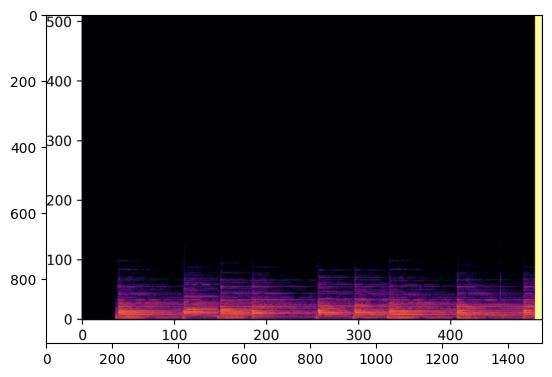

0


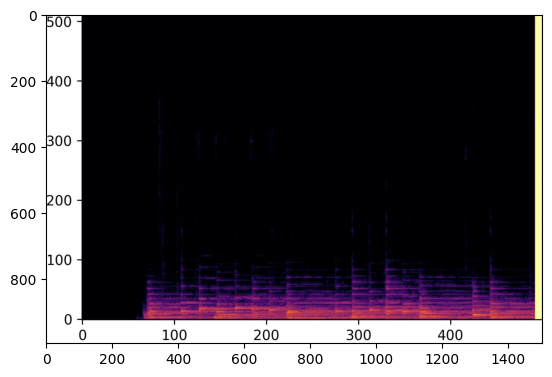

0


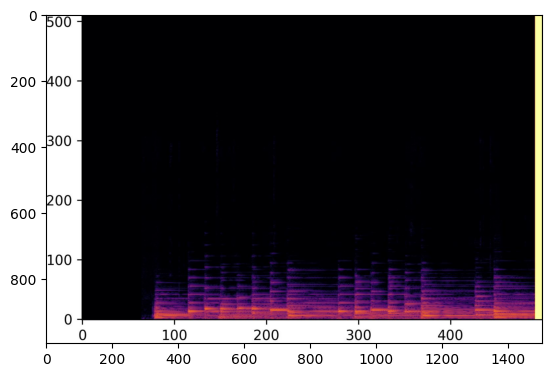

In [37]:
images, labels = next(iter(train_loader))
for k in range(3): 
    image = images[k].numpy().transpose(1, 2, 0) 
    plt.imshow(image)
    print(labels[k].item())
    plt.show()
